<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1SN_jEyu95mdek8gPF6azl3NQuTvhGOZv" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# **Clasificación multiclase** con el dataset MNIST fashion

In [4]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


In [1]:
import tensorflow as tf

# Cargar el conjunto de datos Fashion-MNIST
#(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Redimensionar las imágenes: de 28x28 a 784 (28x28) elementos en un único array
train_images = train_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)

# Normalizar los valores de los píxeles en el rango [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


2024-08-19 19:02:57.954462: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-19 19:02:58.059465: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 19:02:58.098313: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 19:02:58.109629: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-19 19:02:58.226525: I tensorflow/core/platform/cpu_feature_guar

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Regresión logística

In [2]:
from sklearn.linear_model import LogisticRegression
# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=10000, verbose=1)  # Aumenta max_iter si el algoritmo no converge
model.fit(train_images, train_labels)


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7850     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  5.02328D-02

At iterate   50    f=  4.31961D-01    |proj g|=  3.88272D-03

At iterate  100    f=  3.91024D-01    |proj g|=  1.64930D-03

At iterate  150    f=  3.76588D-01    |proj g|=  2.16740D-03

At iterate  200    f=  3.67253D-01    |proj g|=  7.10572D-04

At iterate  250    f=  3.61663D-01    |proj g|=  3.55104D-04

At iterate  300    f=  3.57812D-01    |proj g|=  7.79369D-04

At iterate  350    f=  3.55641D-01    |proj g|=  3.35415D-04

At iterate  400    f=  3.53869D-01    |proj g|=  1.10792D-03

At iterate  450    f=  3.52787D-01    |proj g|=  7.58986D-04

At iterate  500    f=  3.52001D-01    |proj g|=  1.94365D-04

At iterate  550    f=  3.51455D-01    |proj g|=  1.73698D-04

At iterate  600    f=  3.51065D-01    |proj g|=  1.76128D-04

           * * *

Tit   = 

LogisticRegression(max_iter=10000, verbose=1)

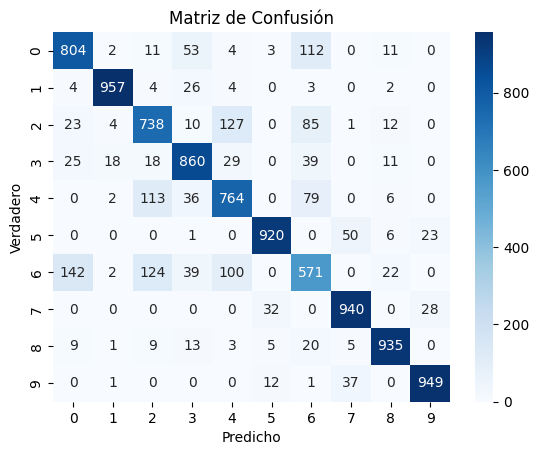

Métricas Principales:

Precisión del modelo: 0.8438

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.86      0.84      1000
           4       0.74      0.76      0.75      1000
           5       0.95      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.92      1000
           8       0.93      0.94      0.93      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [5]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(test_images)

# Calcular la matriz de confusión
conf_mat = confusion_matrix(test_labels, y_pred)

# Dibujar la matriz de confusión
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Calcular y mostrar las métricas principales
print("Métricas Principales:\n")
print(f"Precisión del modelo: {accuracy_score(test_labels, y_pred):.4f}\n")
print(classification_report(test_labels, y_pred))

## Árboles de decisión

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(train_images, train_labels)


DecisionTreeClassifier(random_state=42)

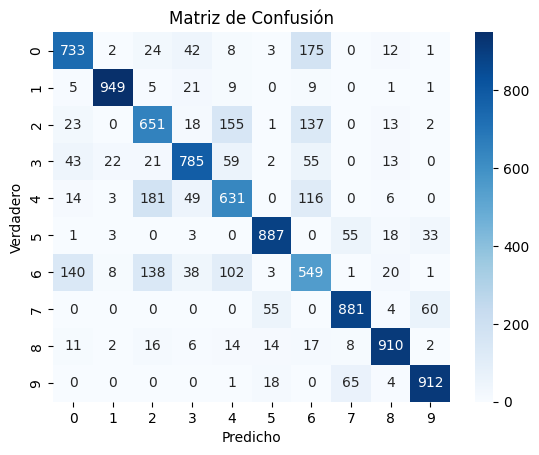

Métricas Principales:

Precisión del modelo: 0.7888

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1000
           1       0.96      0.95      0.95      1000
           2       0.63      0.65      0.64      1000
           3       0.82      0.79      0.80      1000
           4       0.64      0.63      0.64      1000
           5       0.90      0.89      0.89      1000
           6       0.52      0.55      0.53      1000
           7       0.87      0.88      0.88      1000
           8       0.91      0.91      0.91      1000
           9       0.90      0.91      0.91      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [7]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(test_images)

# Calcular la matriz de confusión
conf_mat = confusion_matrix(test_labels, y_pred)

# Dibujar la matriz de confusión
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Calcular y mostrar las métricas principales
print("Métricas Principales:\n")
print(f"Precisión del modelo: {accuracy_score(test_labels, y_pred):.4f}\n")
print(classification_report(test_labels, y_pred))

## Random Forests

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_images, train_labels)


RandomForestClassifier(random_state=42)

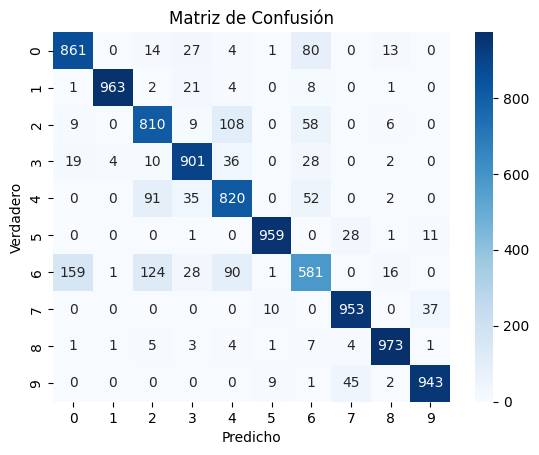

Métricas Principales:

Precisión del modelo: 0.8764

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.77      0.82      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.71      0.58      0.64      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



In [9]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(test_images)

# Calcular la matriz de confusión
conf_mat = confusion_matrix(test_labels, y_pred)

# Dibujar la matriz de confusión
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Calcular y mostrar las métricas principales
print("Métricas Principales:\n")
print(f"Precisión del modelo: {accuracy_score(test_labels, y_pred):.4f}\n")
print(classification_report(test_labels, y_pred))

## XGBoost

In [11]:
!pip -q install xgboost

from xgboost import XGBClassifier

# Crear y entrenar el modelo de árbol de decisión
model = XGBClassifier(random_state=42)
model.fit(train_images, train_labels)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

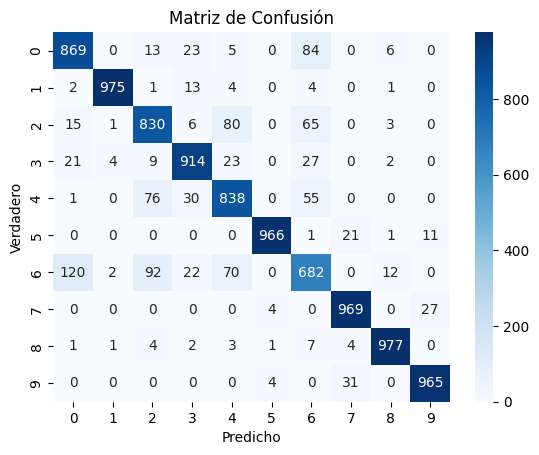

Métricas Principales:

Precisión del modelo: 0.8985

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.83      0.82      1000
           3       0.90      0.91      0.91      1000
           4       0.82      0.84      0.83      1000
           5       0.99      0.97      0.98      1000
           6       0.74      0.68      0.71      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [12]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(test_images)

# Calcular la matriz de confusión
conf_mat = confusion_matrix(test_labels, y_pred)

# Dibujar la matriz de confusión
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Calcular y mostrar las métricas principales
print("Métricas Principales:\n")
print(f"Precisión del modelo: {accuracy_score(test_labels, y_pred):.4f}\n")
print(classification_report(test_labels, y_pred))

## SVM

### One vs All

In [13]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Crear un clasificador SVM
svm_clf = SVC()

# Crear un clasificador OvA utilizando el clasificador SVM
ova_clf = OneVsRestClassifier(svm_clf)

# Entrenar el clasificador OvA en el conjunto de entrenamiento
ova_clf.fit(train_images, train_labels);


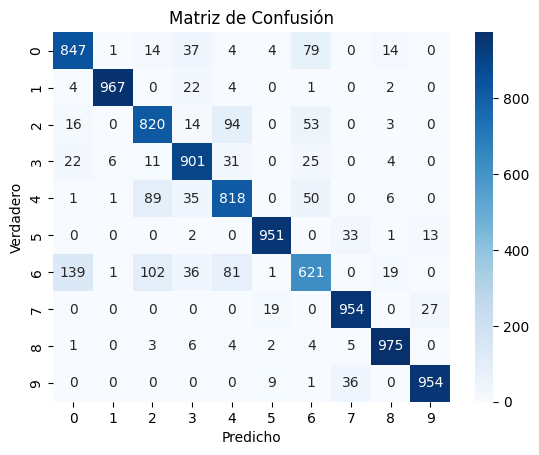

Métricas Principales:

Precisión del modelo: 0.8808

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.86      0.90      0.88      1000
           4       0.79      0.82      0.80      1000
           5       0.96      0.95      0.96      1000
           6       0.74      0.62      0.68      1000
           7       0.93      0.95      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [14]:
# Hacer predicciones en el conjunto de prueba
y_pred = ova_clf.predict(test_images)

# Calcular la matriz de confusión
conf_mat = confusion_matrix(test_labels, y_pred)

# Dibujar la matriz de confusión
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Calcular y mostrar las métricas principales
print("Métricas Principales:\n")
print(f"Precisión del modelo: {accuracy_score(test_labels, y_pred):.4f}\n")
print(classification_report(test_labels, y_pred))

### One vs One

In [15]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Crear un clasificador SVM
svm_clf = SVC()

# Crear un clasificador OvO utilizando el clasificador SVM
ovo_clf = OneVsOneClassifier(svm_clf)

# Entrenar el clasificador OvO en el conjunto de entrenamiento
ovo_clf.fit(train_images, train_labels)


OneVsOneClassifier(estimator=SVC())

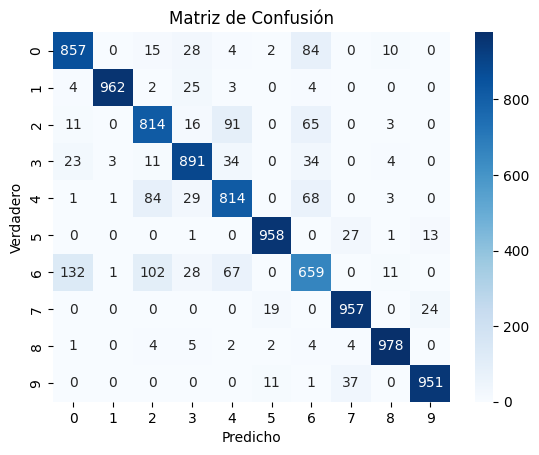

Métricas Principales:

Precisión del modelo: 0.8841

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.81      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.81      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.66      0.69      1000
           7       0.93      0.96      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [16]:
# Hacer predicciones en el conjunto de prueba
y_pred = ovo_clf.predict(test_images)

# Calcular la matriz de confusión
conf_mat = confusion_matrix(test_labels, y_pred)

# Dibujar la matriz de confusión
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Calcular y mostrar las métricas principales
print("Métricas Principales:\n")
print(f"Precisión del modelo: {accuracy_score(test_labels, y_pred):.4f}\n")
print(classification_report(test_labels, y_pred))